In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWar

In [2]:
adata=sc.read_h5ad("./data/t1d.h5ad")
print(adata)
print(adata.X[:10,:10])

AnnData object with n_obs × n_vars = 69645 × 26099
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.1.2', 'seurat_clusters', 'disease_state', 'cell_label', 'disease_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'
  (0, 1)	1.076574683189392
  (3, 1)	0.6022599935531616
  (4, 1)	0.32389

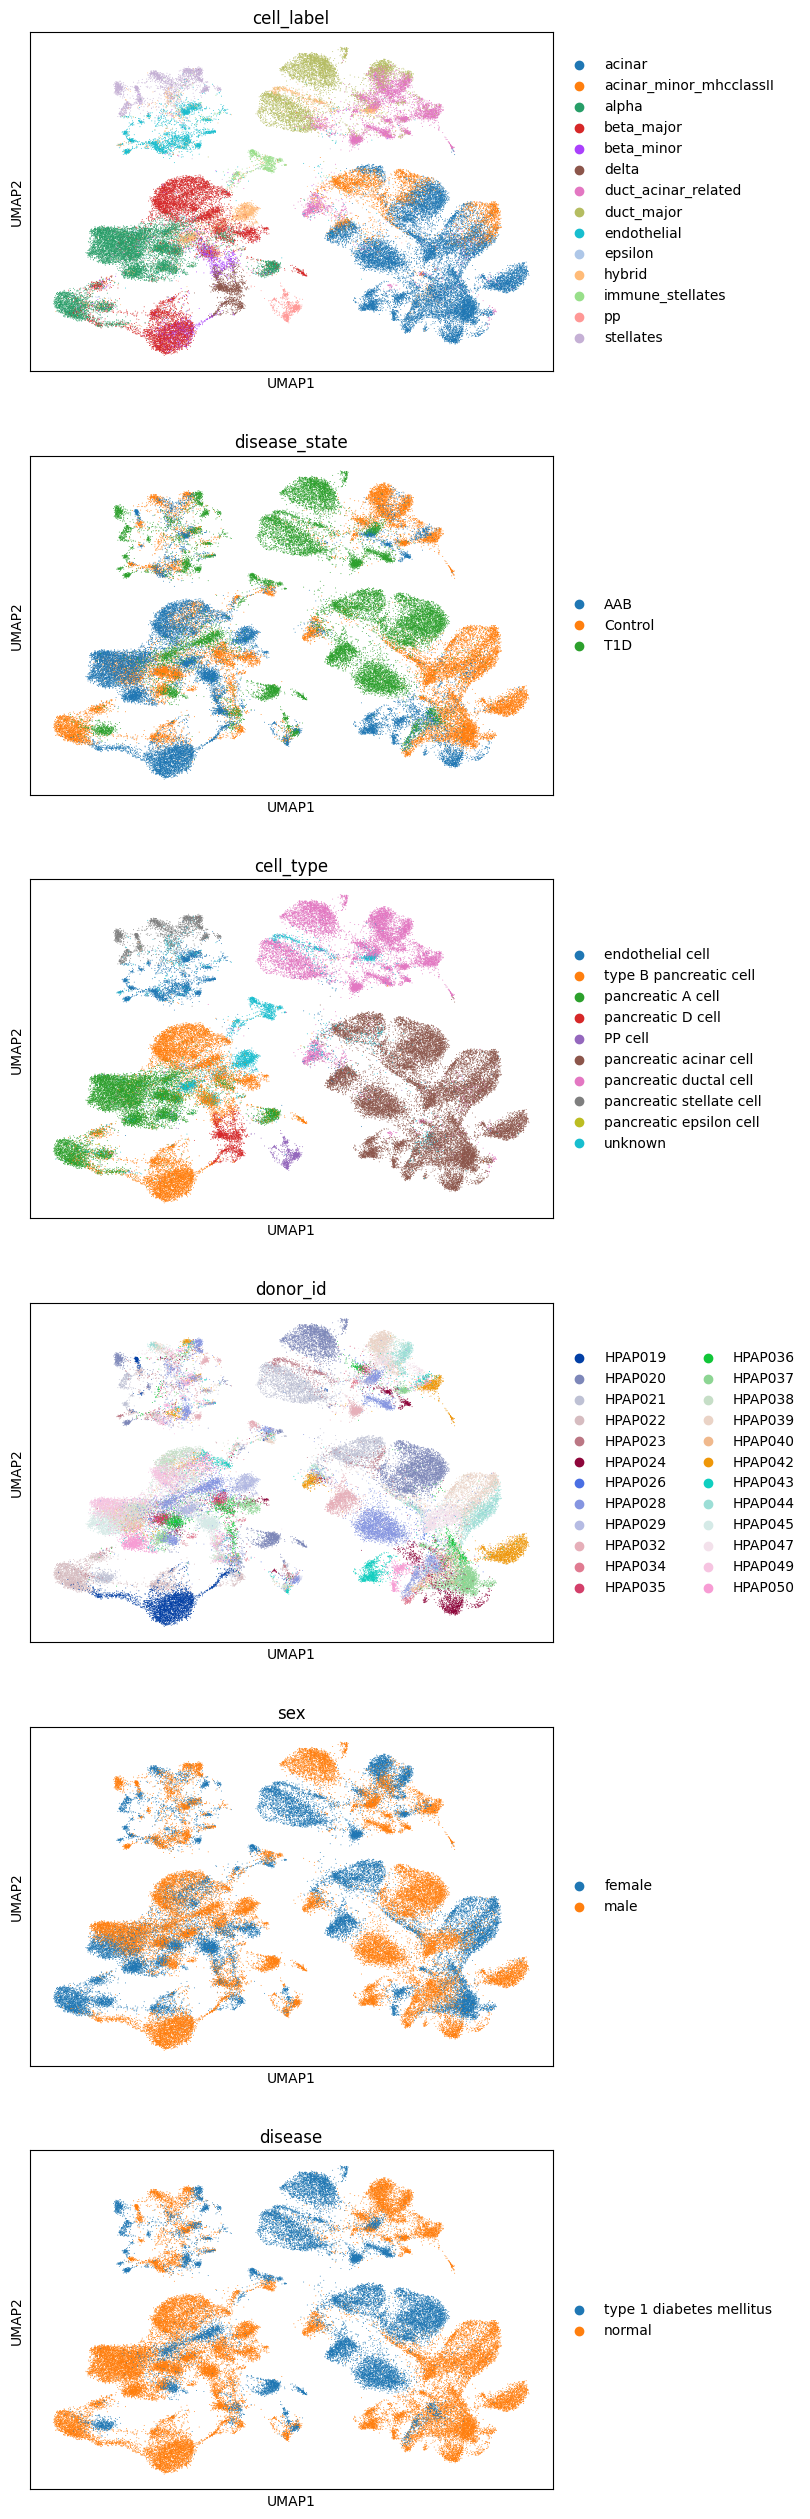

In [3]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata,color=["cell_label","disease_state","cell_type","donor_id","sex","disease"],ncols=1)

In [4]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key="disease_state", contorl_name='Control', num_hvg=2000, require_batch=True,
                            batch_key='donor_id',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./t1d/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./t1d/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

1
Start data preprocessing
Original adata.obs[donor_id] back up to adata.obs['batch_backup']
Original adata.obs[disease_state] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'Control': 0, 'AAB': 1, 'T1D': 2}
Condition mapping to adata.obs['batch']: {'donor_id': {'HPAP022': 0, 'HPAP026': 1, 'HPAP034': 2, 'HPAP035': 3, 'HPAP036': 4, 'HPAP037': 5, 'HPAP039': 6, 'HPAP040': 7, 'HPAP042': 8, 'HPAP044': 9, 'HPAP047': 10, 'HPAP019': 11, 'HPAP024': 12, 'HPAP029': 13, 'HPAP038': 14, 'HPAP043': 15, 'HPAP045': 16, 'HPAP049': 17, 'HPAP050': 18, 'HPAP020': 19, 'HPAP021': 20, 'HPAP023': 21, 'HPAP028': 22, 'HPAP032': 23}}
Unique batch mapping: {'HPAP022': 0, 'HPAP026': 1, 'HPAP034': 2, 'HPAP035': 3, 'HPAP036': 4, 'HPAP037': 5, 'HPAP039': 6, 'HPAP040': 7, 'HPAP042': 8, 'HPAP044': 9, 'HPAP047': 10, 'HPAP019': 11, 'HPAP024': 12, 'HPAP029': 13, 'HPAP038': 14, 'HPAP043': 15, 'HPAP045': 16, 'HPAP049': 17, 'HPAP050': 18, 'HPAP020': 19, 'HPAP021': 20, 'HPAP023': 21, 'HP

Calculating the clusters
Unique groups: ['0_Control' '10_Control' '11_AAB' '12_AAB' '13_AAB' '14_AAB' '15_AAB'
 '16_AAB' '17_AAB' '18_AAB' '19_T1D' '1_Control' '20_T1D' '21_T1D'
 '22_T1D' '23_T1D' '2_Control' '3_Control' '4_Control' '5_Control'
 '6_Control' '7_Control' '8_Control' '9_Control']


Finished clustering
Data preprocessing done


Remaining number of cells: 69645
Too few epoches (steps, if rigorously speaking). Changing epoch to 43 to adjust for number of cells
Require batch: True
Batch name to number mapping (may be used for search for saved adata):
 {'donor_id': {'HPAP022': 0, 'HPAP026': 1, 'HPAP034': 2, 'HPAP035': 3, 'HPAP036': 4, 'HPAP037': 5, 'HPAP039': 6, 'HPAP040': 7, 'HPAP042': 8, 'HPAP044': 9, 'HPAP047': 10, 'HPAP019': 11, 'HPAP024': 12, 'HPAP029': 13, 'HPAP038': 14, 'HPAP043': 15, 'HPAP045': 16, 'HPAP049': 17, 'HPAP050': 18, 'HPAP020': 19, 'HPAP021': 20, 'HPAP023': 21, 'HPAP028': 22, 'HPAP032': 23}}
Condition name to number mapping (may be used for search for saved adata):
 {'Control': 0, 'AAB': 1, 'T1D': 2}
Preprocessing time: 54.48798 seconds


Overall Progress:   0%|          | 0/43 [00:00<?, ?it/s]

Epoch: 1/43 | All Loss: 195.1886 | Neighborhood Loss: 45.7768 | Triplet Loss: 10.7991 | Reconstruction Loss: 8.5226 | Independent Loss: 137.5530 | KL Loss: 0.3300 | Commitment Loss: 0.5600 | Dependent Loss: -8.3529


Resetting 786 unused embeddings.
Resetting 759 unused embeddings.
Resetting 763 unused embeddings.
Resetting 788 unused embeddings.


Resetting 767 unused embeddings.
Resetting 765 unused embeddings.
Resetting 760 unused embeddings.
Resetting 755 unused embeddings.


Resetting 791 unused embeddings.
Resetting 778 unused embeddings.
Resetting 786 unused embeddings.
Resetting 761 unused embeddings.


Resetting 764 unused embeddings.
Resetting 773 unused embeddings.
Resetting 740 unused embeddings.
Resetting 752 unused embeddings.


Resetting 787 unused embeddings.
Resetting 745 unused embeddings.
Resetting 768 unused embeddings.
Resetting 778 unused embeddings.


Resetting 741 unused embeddings.
Resetting 780 unused embeddings.
Resetting 752 unused embeddings.
Resetting 739 unused embeddings.


Resetting 783 unused embeddings.
Resetting 762 unused embeddings.
Resetting 760 unused embeddings.
Resetting 762 unused embeddings.


Resetting 773 unused embeddings.
Resetting 754 unused embeddings.
Resetting 753 unused embeddings.
Resetting 764 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 1


Epoch: 2/43 | All Loss: 111.0497 | Neighborhood Loss: 43.3525 | Triplet Loss: 6.6459 | Reconstruction Loss: 5.5809 | Independent Loss: 60.0482 | KL Loss: 0.1489 | Commitment Loss: 0.2372 | Dependent Loss: -4.9639


Resetting 744 unused embeddings.
Resetting 674 unused embeddings.
Resetting 664 unused embeddings.
Resetting 674 unused embeddings.


Resetting 647 unused embeddings.
Resetting 639 unused embeddings.
Resetting 646 unused embeddings.
Resetting 631 unused embeddings.


Resetting 694 unused embeddings.
Resetting 662 unused embeddings.
Resetting 695 unused embeddings.
Resetting 658 unused embeddings.


Resetting 671 unused embeddings.
Resetting 743 unused embeddings.
Resetting 683 unused embeddings.
Resetting 665 unused embeddings.


Resetting 706 unused embeddings.
Resetting 636 unused embeddings.
Resetting 648 unused embeddings.
Resetting 784 unused embeddings.


Resetting 647 unused embeddings.
Resetting 708 unused embeddings.
Resetting 616 unused embeddings.
Resetting 629 unused embeddings.


Resetting 724 unused embeddings.
Resetting 654 unused embeddings.
Resetting 662 unused embeddings.
Resetting 696 unused embeddings.


Resetting 633 unused embeddings.
Resetting 713 unused embeddings.
Resetting 663 unused embeddings.
Resetting 690 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 2


Epoch: 3/43 | All Loss: 84.3272 | Neighborhood Loss: 42.1751 | Triplet Loss: 5.5834 | Reconstruction Loss: 5.2837 | Independent Loss: 34.5660 | KL Loss: 0.1019 | Commitment Loss: 0.1501 | Dependent Loss: -3.5330


Resetting 691 unused embeddings.
Resetting 662 unused embeddings.
Resetting 608 unused embeddings.
Resetting 614 unused embeddings.


Resetting 637 unused embeddings.
Resetting 631 unused embeddings.
Resetting 634 unused embeddings.
Resetting 654 unused embeddings.


Resetting 679 unused embeddings.
Resetting 657 unused embeddings.
Resetting 662 unused embeddings.
Resetting 635 unused embeddings.


Resetting 673 unused embeddings.
Resetting 689 unused embeddings.
Resetting 667 unused embeddings.
Resetting 658 unused embeddings.


Resetting 677 unused embeddings.
Resetting 630 unused embeddings.
Resetting 594 unused embeddings.
Resetting 741 unused embeddings.


Resetting 605 unused embeddings.
Resetting 661 unused embeddings.
Resetting 624 unused embeddings.
Resetting 624 unused embeddings.


Resetting 710 unused embeddings.
Resetting 641 unused embeddings.
Resetting 667 unused embeddings.
Resetting 658 unused embeddings.


Resetting 641 unused embeddings.
Resetting 685 unused embeddings.
Resetting 649 unused embeddings.
Resetting 639 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 3


Epoch: 4/43 | All Loss: 77.1971 | Neighborhood Loss: 42.5189 | Triplet Loss: 5.5763 | Reconstruction Loss: 5.2844 | Independent Loss: 26.5531 | KL Loss: 0.0968 | Commitment Loss: 0.1400 | Dependent Loss: -2.9724


Resetting 688 unused embeddings.
Resetting 672 unused embeddings.
Resetting 621 unused embeddings.
Resetting 619 unused embeddings.


Resetting 645 unused embeddings.
Resetting 642 unused embeddings.
Resetting 658 unused embeddings.
Resetting 665 unused embeddings.


Resetting 677 unused embeddings.
Resetting 671 unused embeddings.
Resetting 675 unused embeddings.
Resetting 656 unused embeddings.


Resetting 678 unused embeddings.
Resetting 686 unused embeddings.
Resetting 677 unused embeddings.
Resetting 666 unused embeddings.


Resetting 680 unused embeddings.
Resetting 628 unused embeddings.
Resetting 617 unused embeddings.
Resetting 726 unused embeddings.


Resetting 621 unused embeddings.
Resetting 647 unused embeddings.
Resetting 642 unused embeddings.
Resetting 637 unused embeddings.


Resetting 708 unused embeddings.
Resetting 659 unused embeddings.
Resetting 676 unused embeddings.
Resetting 666 unused embeddings.


Resetting 650 unused embeddings.
Resetting 693 unused embeddings.
Resetting 651 unused embeddings.
Resetting 652 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 4
Epoch: 5/43 | All Loss: 74.0689 | Neighborhood Loss: 40.6010 | Triplet Loss: 5.0773 | Reconstruction Loss: 5.1284 | Independent Loss: 26.0350 | KL Loss: 0.1024 | Commitment Loss: 0.1326 | Dependent Loss: -3.0078


Epoch: 6/43 | All Loss: 75.0120 | Neighborhood Loss: 40.9884 | Triplet Loss: 5.0281 | Reconstruction Loss: 5.1904 | Independent Loss: 26.7435 | KL Loss: 0.0952 | Commitment Loss: 0.1360 | Dependent Loss: -3.1698


Resetting 697 unused embeddings.
Resetting 681 unused embeddings.
Resetting 632 unused embeddings.
Resetting 633 unused embeddings.


Resetting 661 unused embeddings.
Resetting 654 unused embeddings.
Resetting 672 unused embeddings.
Resetting 674 unused embeddings.


Resetting 672 unused embeddings.
Resetting 686 unused embeddings.
Resetting 675 unused embeddings.
Resetting 668 unused embeddings.


Resetting 693 unused embeddings.
Resetting 683 unused embeddings.
Resetting 678 unused embeddings.
Resetting 677 unused embeddings.


Resetting 688 unused embeddings.
Resetting 632 unused embeddings.
Resetting 627 unused embeddings.
Resetting 729 unused embeddings.


Resetting 630 unused embeddings.
Resetting 658 unused embeddings.
Resetting 650 unused embeddings.
Resetting 642 unused embeddings.


Resetting 720 unused embeddings.
Resetting 667 unused embeddings.
Resetting 681 unused embeddings.
Resetting 673 unused embeddings.


Resetting 661 unused embeddings.
Resetting 698 unused embeddings.
Resetting 662 unused embeddings.
Resetting 654 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 6


Epoch: 7/43 | All Loss: 68.4785 | Neighborhood Loss: 38.6287 | Triplet Loss: 4.7063 | Reconstruction Loss: 4.9101 | Independent Loss: 22.8529 | KL Loss: 0.1027 | Commitment Loss: 0.1304 | Dependent Loss: -2.8527


Resetting 705 unused embeddings.
Resetting 681 unused embeddings.
Resetting 640 unused embeddings.
Resetting 643 unused embeddings.


Resetting 668 unused embeddings.
Resetting 665 unused embeddings.
Resetting 681 unused embeddings.
Resetting 687 unused embeddings.


Resetting 681 unused embeddings.
Resetting 691 unused embeddings.
Resetting 688 unused embeddings.
Resetting 672 unused embeddings.


Resetting 697 unused embeddings.
Resetting 686 unused embeddings.
Resetting 679 unused embeddings.
Resetting 684 unused embeddings.


Resetting 691 unused embeddings.
Resetting 642 unused embeddings.
Resetting 636 unused embeddings.
Resetting 718 unused embeddings.


Resetting 634 unused embeddings.
Resetting 667 unused embeddings.
Resetting 665 unused embeddings.


Resetting 646 unused embeddings.
Resetting 720 unused embeddings.
Resetting 673 unused embeddings.
Resetting 694 unused embeddings.


Resetting 688 unused embeddings.
Resetting 666 unused embeddings.
Resetting 710 unused embeddings.
Resetting 667 unused embeddings.


Resetting 667 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 7


Epoch: 8/43 | All Loss: 68.7814 | Neighborhood Loss: 39.0366 | Triplet Loss: 5.0369 | Reconstruction Loss: 4.8846 | Independent Loss: 22.3863 | KL Loss: 0.1003 | Commitment Loss: 0.1314 | Dependent Loss: -2.7947


Resetting 713 unused embeddings.
Resetting 694 unused embeddings.
Resetting 645 unused embeddings.
Resetting 651 unused embeddings.


Resetting 673 unused embeddings.
Resetting 673 unused embeddings.
Resetting 688 unused embeddings.
Resetting 693 unused embeddings.


Resetting 685 unused embeddings.
Resetting 696 unused embeddings.
Resetting 695 unused embeddings.
Resetting 675 unused embeddings.


Resetting 701 unused embeddings.
Resetting 682 unused embeddings.
Resetting 679 unused embeddings.
Resetting 696 unused embeddings.


Resetting 693 unused embeddings.
Resetting 650 unused embeddings.
Resetting 643 unused embeddings.
Resetting 725 unused embeddings.


Resetting 642 unused embeddings.
Resetting 670 unused embeddings.
Resetting 674 unused embeddings.
Resetting 654 unused embeddings.


Resetting 722 unused embeddings.
Resetting 684 unused embeddings.
Resetting 700 unused embeddings.
Resetting 696 unused embeddings.


Resetting 678 unused embeddings.
Resetting 715 unused embeddings.
Resetting 677 unused embeddings.
Resetting 680 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 8


Epoch: 9/43 | All Loss: 66.8611 | Neighborhood Loss: 38.0447 | Triplet Loss: 4.1552 | Reconstruction Loss: 4.8332 | Independent Loss: 22.4527 | KL Loss: 0.1076 | Commitment Loss: 0.1323 | Dependent Loss: -2.8647


Resetting 713 unused embeddings.
Resetting 700 unused embeddings.
Resetting 649 unused embeddings.
Resetting 662 unused embeddings.


Resetting 678 unused embeddings.
Resetting 678 unused embeddings.
Resetting 694 unused embeddings.
Resetting 699 unused embeddings.


Resetting 689 unused embeddings.
Resetting 701 unused embeddings.
Resetting 703 unused embeddings.
Resetting 678 unused embeddings.


Resetting 707 unused embeddings.
Resetting 687 unused embeddings.
Resetting 686 unused embeddings.
Resetting 707 unused embeddings.


Resetting 697 unused embeddings.
Resetting 663 unused embeddings.
Resetting 647 unused embeddings.
Resetting 731 unused embeddings.


Resetting 650 unused embeddings.
Resetting 672 unused embeddings.
Resetting 686 unused embeddings.
Resetting 664 unused embeddings.


Resetting 718 unused embeddings.
Resetting 693 unused embeddings.
Resetting 709 unused embeddings.
Resetting 695 unused embeddings.


Resetting 685 unused embeddings.
Resetting 721 unused embeddings.
Resetting 685 unused embeddings.
Resetting 686 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 9
Epoch: 10/43 | All Loss: 66.7240 | Neighborhood Loss: 37.5472 | Triplet Loss: 4.5029 | Reconstruction Loss: 4.8133 | Independent Loss: 22.5323 | KL Loss: 0.1030 | Commitment Loss: 0.1305 | Dependent Loss: -2.9052


Epoch: 11/43 | All Loss: 67.1056 | Neighborhood Loss: 37.5560 | Triplet Loss: 4.0779 | Reconstruction Loss: 4.9124 | Independent Loss: 23.5032 | KL Loss: 0.1094 | Commitment Loss: 0.1418 | Dependent Loss: -3.1951


Resetting 715 unused embeddings.
Resetting 703 unused embeddings.
Resetting 654 unused embeddings.
Resetting 664 unused embeddings.


Resetting 681 unused embeddings.
Resetting 682 unused embeddings.
Resetting 698 unused embeddings.
Resetting 697 unused embeddings.


Resetting 695 unused embeddings.
Resetting 707 unused embeddings.
Resetting 707 unused embeddings.
Resetting 684 unused embeddings.


Resetting 713 unused embeddings.
Resetting 700 unused embeddings.
Resetting 694 unused embeddings.
Resetting 716 unused embeddings.


Resetting 700 unused embeddings.
Resetting 668 unused embeddings.
Resetting 653 unused embeddings.
Resetting 735 unused embeddings.


Resetting 657 unused embeddings.
Resetting 679 unused embeddings.
Resetting 690 unused embeddings.
Resetting 666 unused embeddings.


Resetting 721 unused embeddings.
Resetting 700 unused embeddings.
Resetting 717 unused embeddings.
Resetting 701 unused embeddings.


Resetting 688 unused embeddings.
Resetting 728 unused embeddings.
Resetting 692 unused embeddings.
Resetting 693 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 11


Epoch: 12/43 | All Loss: 64.0091 | Neighborhood Loss: 36.2979 | Triplet Loss: 3.8307 | Reconstruction Loss: 4.6884 | Independent Loss: 21.9897 | KL Loss: 0.1065 | Commitment Loss: 0.1366 | Dependent Loss: -3.0407


Resetting 719 unused embeddings.
Resetting 717 unused embeddings.
Resetting 654 unused embeddings.
Resetting 670 unused embeddings.


Resetting 688 unused embeddings.
Resetting 685 unused embeddings.
Resetting 705 unused embeddings.
Resetting 696 unused embeddings.


Resetting 702 unused embeddings.
Resetting 710 unused embeddings.
Resetting 712 unused embeddings.
Resetting 692 unused embeddings.


Resetting 715 unused embeddings.
Resetting 701 unused embeddings.
Resetting 701 unused embeddings.
Resetting 726 unused embeddings.


Resetting 707 unused embeddings.
Resetting 672 unused embeddings.
Resetting 658 unused embeddings.
Resetting 704 unused embeddings.


Resetting 666 unused embeddings.
Resetting 679 unused embeddings.
Resetting 699 unused embeddings.
Resetting 671 unused embeddings.


Resetting 724 unused embeddings.
Resetting 703 unused embeddings.
Resetting 718 unused embeddings.
Resetting 707 unused embeddings.


Resetting 693 unused embeddings.
Resetting 732 unused embeddings.
Resetting 699 unused embeddings.
Resetting 702 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 12


Epoch: 13/43 | All Loss: 64.1139 | Neighborhood Loss: 35.6901 | Triplet Loss: 3.9106 | Reconstruction Loss: 4.6240 | Independent Loss: 23.0730 | KL Loss: 0.1026 | Commitment Loss: 0.1414 | Dependent Loss: -3.4279


Resetting 723 unused embeddings.
Resetting 724 unused embeddings.
Resetting 655 unused embeddings.
Resetting 675 unused embeddings.


Resetting 691 unused embeddings.
Resetting 690 unused embeddings.
Resetting 710 unused embeddings.
Resetting 703 unused embeddings.


Resetting 703 unused embeddings.
Resetting 716 unused embeddings.
Resetting 718 unused embeddings.
Resetting 697 unused embeddings.


Resetting 718 unused embeddings.
Resetting 702 unused embeddings.
Resetting 706 unused embeddings.
Resetting 724 unused embeddings.


Resetting 711 unused embeddings.
Resetting 675 unused embeddings.
Resetting 667 unused embeddings.
Resetting 721 unused embeddings.


Resetting 669 unused embeddings.
Resetting 680 unused embeddings.
Resetting 702 unused embeddings.
Resetting 678 unused embeddings.


Resetting 726 unused embeddings.
Resetting 701 unused embeddings.
Resetting 720 unused embeddings.
Resetting 713 unused embeddings.


Resetting 701 unused embeddings.
Resetting 737 unused embeddings.
Resetting 702 unused embeddings.
Resetting 705 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 13


Epoch: 14/43 | All Loss: 63.8701 | Neighborhood Loss: 35.6197 | Triplet Loss: 3.6122 | Reconstruction Loss: 4.6240 | Independent Loss: 23.2952 | KL Loss: 0.1032 | Commitment Loss: 0.1438 | Dependent Loss: -3.5280


Resetting 725 unused embeddings.
Resetting 734 unused embeddings.
Resetting 660 unused embeddings.
Resetting 684 unused embeddings.


Resetting 692 unused embeddings.
Resetting 695 unused embeddings.
Resetting 713 unused embeddings.
Resetting 712 unused embeddings.


Resetting 702 unused embeddings.
Resetting 717 unused embeddings.
Resetting 717 unused embeddings.
Resetting 699 unused embeddings.


Resetting 718 unused embeddings.
Resetting 703 unused embeddings.
Resetting 709 unused embeddings.
Resetting 727 unused embeddings.


Resetting 714 unused embeddings.
Resetting 677 unused embeddings.
Resetting 670 unused embeddings.
Resetting 725 unused embeddings.


Resetting 670 unused embeddings.
Resetting 681 unused embeddings.
Resetting 707 unused embeddings.
Resetting 681 unused embeddings.


Resetting 724 unused embeddings.
Resetting 700 unused embeddings.
Resetting 724 unused embeddings.
Resetting 716 unused embeddings.


Resetting 703 unused embeddings.
Resetting 740 unused embeddings.
Resetting 710 unused embeddings.
Resetting 706 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 14
Epoch: 15/43 | All Loss: 61.9173 | Neighborhood Loss: 35.3395 | Triplet Loss: 3.3641 | Reconstruction Loss: 4.5862 | Independent Loss: 21.7061 | KL Loss: 0.1088 | Commitment Loss: 0.1466 | Dependent Loss: -3.3340


Epoch: 16/43 | All Loss: 64.7528 | Neighborhood Loss: 36.7108 | Triplet Loss: 3.7504 | Reconstruction Loss: 4.7576 | Independent Loss: 22.7773 | KL Loss: 0.1060 | Commitment Loss: 0.1492 | Dependent Loss: -3.4985


Resetting 730 unused embeddings.
Resetting 736 unused embeddings.
Resetting 665 unused embeddings.
Resetting 687 unused embeddings.


Resetting 698 unused embeddings.
Resetting 698 unused embeddings.
Resetting 717 unused embeddings.
Resetting 714 unused embeddings.


Resetting 707 unused embeddings.
Resetting 719 unused embeddings.
Resetting 721 unused embeddings.
Resetting 700 unused embeddings.


Resetting 718 unused embeddings.
Resetting 703 unused embeddings.
Resetting 714 unused embeddings.
Resetting 728 unused embeddings.


Resetting 719 unused embeddings.
Resetting 682 unused embeddings.
Resetting 676 unused embeddings.
Resetting 727 unused embeddings.


Resetting 682 unused embeddings.
Resetting 682 unused embeddings.
Resetting 712 unused embeddings.
Resetting 685 unused embeddings.


Resetting 725 unused embeddings.
Resetting 702 unused embeddings.
Resetting 727 unused embeddings.
Resetting 719 unused embeddings.


Resetting 703 unused embeddings.
Resetting 750 unused embeddings.
Resetting 711 unused embeddings.
Resetting 709 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 16


Epoch: 17/43 | All Loss: 62.0598 | Neighborhood Loss: 34.9562 | Triplet Loss: 3.6426 | Reconstruction Loss: 4.5385 | Independent Loss: 22.1346 | KL Loss: 0.1038 | Commitment Loss: 0.1467 | Dependent Loss: -3.4626


Resetting 733 unused embeddings.
Resetting 740 unused embeddings.
Resetting 669 unused embeddings.
Resetting 687 unused embeddings.


Resetting 700 unused embeddings.
Resetting 700 unused embeddings.
Resetting 719 unused embeddings.
Resetting 718 unused embeddings.


Resetting 704 unused embeddings.
Resetting 720 unused embeddings.
Resetting 722 unused embeddings.
Resetting 698 unused embeddings.


Resetting 718 unused embeddings.
Resetting 704 unused embeddings.
Resetting 717 unused embeddings.
Resetting 732 unused embeddings.


Resetting 728 unused embeddings.
Resetting 684 unused embeddings.
Resetting 679 unused embeddings.
Resetting 731 unused embeddings.


Resetting 686 unused embeddings.
Resetting 685 unused embeddings.
Resetting 714 unused embeddings.
Resetting 686 unused embeddings.


Resetting 730 unused embeddings.
Resetting 708 unused embeddings.
Resetting 731 unused embeddings.
Resetting 722 unused embeddings.


Resetting 705 unused embeddings.
Resetting 751 unused embeddings.
Resetting 719 unused embeddings.
Resetting 708 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 17


Epoch: 18/43 | All Loss: 62.5932 | Neighborhood Loss: 34.4108 | Triplet Loss: 3.6100 | Reconstruction Loss: 4.5164 | Independent Loss: 23.2476 | KL Loss: 0.1060 | Commitment Loss: 0.1472 | Dependent Loss: -3.4449


Resetting 738 unused embeddings.
Resetting 743 unused embeddings.
Resetting 670 unused embeddings.
Resetting 691 unused embeddings.


Resetting 703 unused embeddings.
Resetting 704 unused embeddings.
Resetting 724 unused embeddings.
Resetting 721 unused embeddings.


Resetting 706 unused embeddings.
Resetting 723 unused embeddings.
Resetting 726 unused embeddings.
Resetting 698 unused embeddings.


Resetting 721 unused embeddings.
Resetting 707 unused embeddings.
Resetting 718 unused embeddings.
Resetting 732 unused embeddings.


Resetting 730 unused embeddings.
Resetting 685 unused embeddings.
Resetting 680 unused embeddings.
Resetting 737 unused embeddings.


Resetting 691 unused embeddings.
Resetting 682 unused embeddings.
Resetting 717 unused embeddings.
Resetting 692 unused embeddings.


Resetting 736 unused embeddings.
Resetting 714 unused embeddings.
Resetting 736 unused embeddings.
Resetting 723 unused embeddings.


Resetting 711 unused embeddings.
Resetting 756 unused embeddings.
Resetting 722 unused embeddings.
Resetting 711 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 18


Epoch: 19/43 | All Loss: 62.4556 | Neighborhood Loss: 34.7816 | Triplet Loss: 3.0346 | Reconstruction Loss: 4.5175 | Independent Loss: 23.5759 | KL Loss: 0.1082 | Commitment Loss: 0.1481 | Dependent Loss: -3.7103


Resetting 735 unused embeddings.
Resetting 749 unused embeddings.
Resetting 675 unused embeddings.
Resetting 691 unused embeddings.


Resetting 706 unused embeddings.
Resetting 708 unused embeddings.
Resetting 726 unused embeddings.
Resetting 722 unused embeddings.


Resetting 704 unused embeddings.
Resetting 722 unused embeddings.
Resetting 730 unused embeddings.
Resetting 699 unused embeddings.


Resetting 732 unused embeddings.
Resetting 708 unused embeddings.
Resetting 716 unused embeddings.
Resetting 736 unused embeddings.


Resetting 732 unused embeddings.
Resetting 688 unused embeddings.
Resetting 683 unused embeddings.


Resetting 743 unused embeddings.
Resetting 692 unused embeddings.
Resetting 688 unused embeddings.


Resetting 722 unused embeddings.
Resetting 694 unused embeddings.
Resetting 741 unused embeddings.
Resetting 716 unused embeddings.


Resetting 736 unused embeddings.
Resetting 725 unused embeddings.
Resetting 712 unused embeddings.
Resetting 759 unused embeddings.


Resetting 724 unused embeddings.
Resetting 714 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 19
Epoch: 20/43 | All Loss: 62.2614 | Neighborhood Loss: 34.3012 | Triplet Loss: 2.9072 | Reconstruction Loss: 4.4902 | Independent Loss: 24.0869 | KL Loss: 0.1070 | Commitment Loss: 0.1517 | Dependent Loss: -3.7827


Epoch: 21/43 | All Loss: 64.3815 | Neighborhood Loss: 35.7964 | Triplet Loss: 3.3641 | Reconstruction Loss: 4.6710 | Independent Loss: 24.0405 | KL Loss: 0.1159 | Commitment Loss: 0.1571 | Dependent Loss: -3.7635


Resetting 737 unused embeddings.
Resetting 750 unused embeddings.
Resetting 676 unused embeddings.
Resetting 694 unused embeddings.


Resetting 707 unused embeddings.
Resetting 709 unused embeddings.
Resetting 729 unused embeddings.
Resetting 724 unused embeddings.


Resetting 706 unused embeddings.
Resetting 723 unused embeddings.
Resetting 731 unused embeddings.
Resetting 691 unused embeddings.


Resetting 736 unused embeddings.
Resetting 710 unused embeddings.
Resetting 717 unused embeddings.
Resetting 739 unused embeddings.


Resetting 733 unused embeddings.
Resetting 688 unused embeddings.
Resetting 687 unused embeddings.
Resetting 747 unused embeddings.


Resetting 694 unused embeddings.
Resetting 686 unused embeddings.
Resetting 725 unused embeddings.
Resetting 698 unused embeddings.


Resetting 749 unused embeddings.
Resetting 714 unused embeddings.
Resetting 739 unused embeddings.
Resetting 728 unused embeddings.


Resetting 713 unused embeddings.
Resetting 759 unused embeddings.
Resetting 724 unused embeddings.
Resetting 714 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 21


Epoch: 22/43 | All Loss: 62.5103 | Neighborhood Loss: 35.3130 | Triplet Loss: 3.3553 | Reconstruction Loss: 4.5497 | Independent Loss: 22.3556 | KL Loss: 0.1074 | Commitment Loss: 0.1477 | Dependent Loss: -3.3185


Resetting 739 unused embeddings.
Resetting 755 unused embeddings.
Resetting 676 unused embeddings.
Resetting 696 unused embeddings.


Resetting 708 unused embeddings.
Resetting 713 unused embeddings.
Resetting 730 unused embeddings.
Resetting 729 unused embeddings.


Resetting 706 unused embeddings.
Resetting 724 unused embeddings.
Resetting 733 unused embeddings.
Resetting 694 unused embeddings.


Resetting 737 unused embeddings.
Resetting 712 unused embeddings.
Resetting 722 unused embeddings.


Resetting 740 unused embeddings.
Resetting 736 unused embeddings.
Resetting 690 unused embeddings.
Resetting 691 unused embeddings.


Resetting 752 unused embeddings.
Resetting 699 unused embeddings.
Resetting 693 unused embeddings.
Resetting 729 unused embeddings.


Resetting 703 unused embeddings.
Resetting 749 unused embeddings.
Resetting 715 unused embeddings.
Resetting 741 unused embeddings.


Resetting 727 unused embeddings.
Resetting 714 unused embeddings.
Resetting 761 unused embeddings.
Resetting 724 unused embeddings.


Resetting 720 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 22


Epoch: 23/43 | All Loss: 60.9623 | Neighborhood Loss: 35.3552 | Triplet Loss: 3.3622 | Reconstruction Loss: 4.5371 | Independent Loss: 20.7632 | KL Loss: 0.1114 | Commitment Loss: 0.1478 | Dependent Loss: -3.3147


Resetting 746 unused embeddings.
Resetting 757 unused embeddings.
Resetting 680 unused embeddings.
Resetting 697 unused embeddings.


Resetting 711 unused embeddings.
Resetting 717 unused embeddings.
Resetting 731 unused embeddings.
Resetting 730 unused embeddings.


Resetting 708 unused embeddings.
Resetting 726 unused embeddings.
Resetting 734 unused embeddings.
Resetting 697 unused embeddings.


Resetting 739 unused embeddings.
Resetting 716 unused embeddings.
Resetting 726 unused embeddings.
Resetting 741 unused embeddings.


Resetting 738 unused embeddings.
Resetting 693 unused embeddings.
Resetting 692 unused embeddings.
Resetting 753 unused embeddings.


Resetting 701 unused embeddings.
Resetting 694 unused embeddings.
Resetting 729 unused embeddings.
Resetting 709 unused embeddings.


Resetting 751 unused embeddings.
Resetting 719 unused embeddings.
Resetting 741 unused embeddings.
Resetting 727 unused embeddings.


Resetting 717 unused embeddings.
Resetting 764 unused embeddings.
Resetting 728 unused embeddings.
Resetting 723 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 23


Epoch: 24/43 | All Loss: 61.3023 | Neighborhood Loss: 34.7116 | Triplet Loss: 3.7161 | Reconstruction Loss: 4.5153 | Independent Loss: 21.4937 | KL Loss: 0.1051 | Commitment Loss: 0.1502 | Dependent Loss: -3.3898


Resetting 751 unused embeddings.
Resetting 758 unused embeddings.
Resetting 681 unused embeddings.
Resetting 698 unused embeddings.


Resetting 712 unused embeddings.
Resetting 718 unused embeddings.
Resetting 732 unused embeddings.
Resetting 733 unused embeddings.


Resetting 713 unused embeddings.
Resetting 727 unused embeddings.
Resetting 738 unused embeddings.
Resetting 701 unused embeddings.


Resetting 741 unused embeddings.
Resetting 716 unused embeddings.
Resetting 727 unused embeddings.
Resetting 744 unused embeddings.


Resetting 740 unused embeddings.
Resetting 698 unused embeddings.
Resetting 693 unused embeddings.
Resetting 759 unused embeddings.


Resetting 703 unused embeddings.
Resetting 696 unused embeddings.
Resetting 729 unused embeddings.
Resetting 710 unused embeddings.


Resetting 756 unused embeddings.
Resetting 723 unused embeddings.
Resetting 743 unused embeddings.
Resetting 725 unused embeddings.


Resetting 717 unused embeddings.
Resetting 764 unused embeddings.
Resetting 731 unused embeddings.
Resetting 726 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 24
Epoch: 25/43 | All Loss: 59.1138 | Neighborhood Loss: 33.9787 | Triplet Loss: 3.3565 | Reconstruction Loss: 4.4501 | Independent Loss: 20.5482 | KL Loss: 0.1085 | Commitment Loss: 0.1560 | Dependent Loss: -3.4842


Epoch: 26/43 | All Loss: 61.4917 | Neighborhood Loss: 35.3545 | Triplet Loss: 3.1308 | Reconstruction Loss: 4.6241 | Independent Loss: 21.7282 | KL Loss: 0.1132 | Commitment Loss: 0.1580 | Dependent Loss: -3.6171


Resetting 753 unused embeddings.
Resetting 764 unused embeddings.
Resetting 681 unused embeddings.
Resetting 701 unused embeddings.


Resetting 712 unused embeddings.
Resetting 720 unused embeddings.
Resetting 733 unused embeddings.
Resetting 736 unused embeddings.


Resetting 713 unused embeddings.
Resetting 728 unused embeddings.
Resetting 740 unused embeddings.
Resetting 702 unused embeddings.


Resetting 744 unused embeddings.
Resetting 716 unused embeddings.
Resetting 730 unused embeddings.
Resetting 746 unused embeddings.


Resetting 740 unused embeddings.
Resetting 701 unused embeddings.
Resetting 693 unused embeddings.
Resetting 763 unused embeddings.


Resetting 705 unused embeddings.
Resetting 700 unused embeddings.
Resetting 731 unused embeddings.
Resetting 715 unused embeddings.


Resetting 756 unused embeddings.
Resetting 727 unused embeddings.
Resetting 743 unused embeddings.
Resetting 723 unused embeddings.


Resetting 722 unused embeddings.
Resetting 764 unused embeddings.
Resetting 735 unused embeddings.
Resetting 728 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 26


Epoch: 27/43 | All Loss: 60.7336 | Neighborhood Loss: 34.7518 | Triplet Loss: 3.4502 | Reconstruction Loss: 4.5128 | Independent Loss: 21.4850 | KL Loss: 0.1046 | Commitment Loss: 0.1510 | Dependent Loss: -3.7217


Resetting 753 unused embeddings.
Resetting 765 unused embeddings.
Resetting 680 unused embeddings.
Resetting 702 unused embeddings.


Resetting 713 unused embeddings.
Resetting 721 unused embeddings.
Resetting 735 unused embeddings.
Resetting 737 unused embeddings.


Resetting 713 unused embeddings.
Resetting 727 unused embeddings.
Resetting 741 unused embeddings.
Resetting 703 unused embeddings.


Resetting 746 unused embeddings.
Resetting 715 unused embeddings.
Resetting 732 unused embeddings.
Resetting 746 unused embeddings.


Resetting 742 unused embeddings.
Resetting 702 unused embeddings.
Resetting 696 unused embeddings.
Resetting 765 unused embeddings.


Resetting 706 unused embeddings.
Resetting 701 unused embeddings.
Resetting 732 unused embeddings.
Resetting 717 unused embeddings.


Resetting 757 unused embeddings.
Resetting 733 unused embeddings.
Resetting 746 unused embeddings.
Resetting 724 unused embeddings.


Resetting 723 unused embeddings.
Resetting 765 unused embeddings.
Resetting 736 unused embeddings.


Resetting 728 unused embeddings.
Finish resetting codebook embeddings, current step (epoch): 27


Epoch: 28/43 | All Loss: 58.2958 | Neighborhood Loss: 33.6908 | Triplet Loss: 3.2909 | Reconstruction Loss: 4.4619 | Independent Loss: 20.3013 | KL Loss: 0.1103 | Commitment Loss: 0.1514 | Dependent Loss: -3.7107


Resetting 755 unused embeddings.
Resetting 770 unused embeddings.
Resetting 679 unused embeddings.
Resetting 704 unused embeddings.


Resetting 713 unused embeddings.
Resetting 723 unused embeddings.
Resetting 736 unused embeddings.
Resetting 739 unused embeddings.


Resetting 718 unused embeddings.
Resetting 728 unused embeddings.
Resetting 742 unused embeddings.
Resetting 705 unused embeddings.


Resetting 749 unused embeddings.
Resetting 715 unused embeddings.
Resetting 732 unused embeddings.
Resetting 747 unused embeddings.


Resetting 743 unused embeddings.
Resetting 704 unused embeddings.
Resetting 696 unused embeddings.
Resetting 767 unused embeddings.


Resetting 710 unused embeddings.
Resetting 701 unused embeddings.
Resetting 733 unused embeddings.
Resetting 718 unused embeddings.


Resetting 759 unused embeddings.
Resetting 736 unused embeddings.
Resetting 747 unused embeddings.
Resetting 725 unused embeddings.


Resetting 724 unused embeddings.
Resetting 766 unused embeddings.
Resetting 737 unused embeddings.
Resetting 729 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 28


Epoch: 29/43 | All Loss: 58.0110 | Neighborhood Loss: 32.3860 | Triplet Loss: 3.0046 | Reconstruction Loss: 4.3644 | Independent Loss: 21.8141 | KL Loss: 0.1122 | Commitment Loss: 0.1584 | Dependent Loss: -3.8289


Resetting 756 unused embeddings.
Resetting 770 unused embeddings.
Resetting 681 unused embeddings.
Resetting 706 unused embeddings.


Resetting 715 unused embeddings.
Resetting 725 unused embeddings.
Resetting 736 unused embeddings.
Resetting 743 unused embeddings.


Resetting 720 unused embeddings.
Resetting 728 unused embeddings.
Resetting 744 unused embeddings.
Resetting 706 unused embeddings.


Resetting 750 unused embeddings.
Resetting 716 unused embeddings.
Resetting 734 unused embeddings.
Resetting 748 unused embeddings.


Resetting 746 unused embeddings.
Resetting 704 unused embeddings.
Resetting 696 unused embeddings.
Resetting 770 unused embeddings.


Resetting 714 unused embeddings.
Resetting 700 unused embeddings.
Resetting 735 unused embeddings.
Resetting 721 unused embeddings.


Resetting 759 unused embeddings.
Resetting 739 unused embeddings.
Resetting 746 unused embeddings.
Resetting 727 unused embeddings.


Resetting 726 unused embeddings.
Resetting 771 unused embeddings.
Resetting 737 unused embeddings.
Resetting 728 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 29
Epoch: 30/43 | All Loss: 58.7288 | Neighborhood Loss: 33.4934 | Triplet Loss: 3.2877 | Reconstruction Loss: 4.3463 | Independent Loss: 21.1292 | KL Loss: 0.1069 | Commitment Loss: 0.1604 | Dependent Loss: -3.7950


Epoch: 31/43 | All Loss: 59.4301 | Neighborhood Loss: 33.9821 | Triplet Loss: 2.9650 | Reconstruction Loss: 4.5173 | Independent Loss: 21.8533 | KL Loss: 0.1089 | Commitment Loss: 0.1674 | Dependent Loss: -4.1638


Resetting 757 unused embeddings.
Resetting 772 unused embeddings.
Resetting 682 unused embeddings.
Resetting 707 unused embeddings.


Resetting 715 unused embeddings.
Resetting 725 unused embeddings.
Resetting 737 unused embeddings.
Resetting 745 unused embeddings.


Resetting 720 unused embeddings.
Resetting 730 unused embeddings.
Resetting 742 unused embeddings.
Resetting 706 unused embeddings.


Resetting 751 unused embeddings.
Resetting 724 unused embeddings.
Resetting 731 unused embeddings.


Resetting 748 unused embeddings.
Resetting 746 unused embeddings.
Resetting 703 unused embeddings.
Resetting 696 unused embeddings.


Resetting 771 unused embeddings.
Resetting 718 unused embeddings.
Resetting 698 unused embeddings.
Resetting 735 unused embeddings.


Resetting 723 unused embeddings.
Resetting 753 unused embeddings.
Resetting 740 unused embeddings.
Resetting 747 unused embeddings.


Resetting 729 unused embeddings.
Resetting 727 unused embeddings.
Resetting 773 unused embeddings.
Resetting 739 unused embeddings.


Resetting 727 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 31


Epoch: 32/43 | All Loss: 57.3696 | Neighborhood Loss: 33.1664 | Triplet Loss: 2.8575 | Reconstruction Loss: 4.3237 | Independent Loss: 20.6993 | KL Loss: 0.1056 | Commitment Loss: 0.1641 | Dependent Loss: -3.9469


Resetting 760 unused embeddings.
Resetting 772 unused embeddings.
Resetting 680 unused embeddings.
Resetting 709 unused embeddings.


Resetting 717 unused embeddings.
Resetting 727 unused embeddings.
Resetting 738 unused embeddings.
Resetting 745 unused embeddings.


Resetting 721 unused embeddings.
Resetting 732 unused embeddings.
Resetting 742 unused embeddings.
Resetting 709 unused embeddings.


Resetting 750 unused embeddings.
Resetting 726 unused embeddings.
Resetting 731 unused embeddings.
Resetting 746 unused embeddings.


Resetting 747 unused embeddings.
Resetting 703 unused embeddings.
Resetting 698 unused embeddings.
Resetting 771 unused embeddings.


Resetting 718 unused embeddings.
Resetting 703 unused embeddings.
Resetting 736 unused embeddings.
Resetting 724 unused embeddings.


Resetting 755 unused embeddings.
Resetting 745 unused embeddings.
Resetting 747 unused embeddings.
Resetting 730 unused embeddings.


Resetting 729 unused embeddings.
Resetting 776 unused embeddings.
Resetting 739 unused embeddings.
Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 32


Epoch: 33/43 | All Loss: 57.8979 | Neighborhood Loss: 32.3015 | Triplet Loss: 2.9674 | Reconstruction Loss: 4.3195 | Independent Loss: 22.1095 | KL Loss: 0.1075 | Commitment Loss: 0.1664 | Dependent Loss: -4.0739


Resetting 760 unused embeddings.
Resetting 772 unused embeddings.
Resetting 681 unused embeddings.
Resetting 710 unused embeddings.


Resetting 719 unused embeddings.
Resetting 729 unused embeddings.
Resetting 740 unused embeddings.
Resetting 746 unused embeddings.


Resetting 724 unused embeddings.
Resetting 732 unused embeddings.
Resetting 741 unused embeddings.
Resetting 711 unused embeddings.


Resetting 753 unused embeddings.
Resetting 728 unused embeddings.
Resetting 730 unused embeddings.
Resetting 745 unused embeddings.


Resetting 748 unused embeddings.
Resetting 706 unused embeddings.
Resetting 698 unused embeddings.
Resetting 775 unused embeddings.


Resetting 718 unused embeddings.
Resetting 703 unused embeddings.
Resetting 737 unused embeddings.
Resetting 725 unused embeddings.


Resetting 756 unused embeddings.
Resetting 747 unused embeddings.
Resetting 749 unused embeddings.
Resetting 731 unused embeddings.


Resetting 730 unused embeddings.
Resetting 778 unused embeddings.
Resetting 739 unused embeddings.
Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 33


Epoch: 34/43 | All Loss: 58.4578 | Neighborhood Loss: 32.9904 | Triplet Loss: 2.7887 | Reconstruction Loss: 4.3568 | Independent Loss: 22.0013 | KL Loss: 0.1026 | Commitment Loss: 0.1653 | Dependent Loss: -3.9473


Resetting 759 unused embeddings.
Resetting 772 unused embeddings.
Resetting 683 unused embeddings.
Resetting 711 unused embeddings.


Resetting 721 unused embeddings.
Resetting 729 unused embeddings.
Resetting 742 unused embeddings.
Resetting 746 unused embeddings.


Resetting 727 unused embeddings.
Resetting 733 unused embeddings.
Resetting 743 unused embeddings.
Resetting 711 unused embeddings.


Resetting 755 unused embeddings.
Resetting 731 unused embeddings.
Resetting 730 unused embeddings.
Resetting 747 unused embeddings.


Resetting 749 unused embeddings.
Resetting 708 unused embeddings.
Resetting 699 unused embeddings.
Resetting 775 unused embeddings.


Resetting 719 unused embeddings.
Resetting 707 unused embeddings.
Resetting 737 unused embeddings.
Resetting 725 unused embeddings.


Resetting 759 unused embeddings.
Resetting 746 unused embeddings.
Resetting 749 unused embeddings.
Resetting 732 unused embeddings.


Resetting 731 unused embeddings.
Resetting 780 unused embeddings.
Resetting 739 unused embeddings.
Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 34
Epoch: 35/43 | All Loss: 57.6225 | Neighborhood Loss: 31.8730 | Triplet Loss: 2.7206 | Reconstruction Loss: 4.3514 | Independent Loss: 22.4724 | KL Loss: 0.1056 | Commitment Loss: 0.1650 | Dependent Loss: -4.0656


Epoch: 36/43 | All Loss: 60.7576 | Neighborhood Loss: 33.5244 | Triplet Loss: 2.9654 | Reconstruction Loss: 4.5061 | Independent Loss: 23.8414 | KL Loss: 0.1088 | Commitment Loss: 0.1815 | Dependent Loss: -4.3700


Resetting 758 unused embeddings.
Resetting 772 unused embeddings.
Resetting 686 unused embeddings.
Resetting 711 unused embeddings.


Resetting 723 unused embeddings.
Resetting 730 unused embeddings.
Resetting 743 unused embeddings.
Resetting 748 unused embeddings.


Resetting 729 unused embeddings.
Resetting 734 unused embeddings.
Resetting 744 unused embeddings.
Resetting 710 unused embeddings.


Resetting 756 unused embeddings.
Resetting 731 unused embeddings.
Resetting 732 unused embeddings.
Resetting 750 unused embeddings.


Resetting 750 unused embeddings.
Resetting 711 unused embeddings.
Resetting 701 unused embeddings.
Resetting 777 unused embeddings.


Resetting 718 unused embeddings.
Resetting 710 unused embeddings.
Resetting 738 unused embeddings.
Resetting 729 unused embeddings.


Resetting 761 unused embeddings.
Resetting 750 unused embeddings.
Resetting 749 unused embeddings.


Resetting 731 unused embeddings.
Resetting 733 unused embeddings.
Resetting 780 unused embeddings.
Resetting 739 unused embeddings.


Resetting 731 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 36


Epoch: 37/43 | All Loss: 58.8110 | Neighborhood Loss: 32.6745 | Triplet Loss: 3.0800 | Reconstruction Loss: 4.3881 | Independent Loss: 22.7134 | KL Loss: 0.1040 | Commitment Loss: 0.1731 | Dependent Loss: -4.3222


Resetting 760 unused embeddings.
Resetting 775 unused embeddings.
Resetting 685 unused embeddings.
Resetting 711 unused embeddings.


Resetting 722 unused embeddings.
Resetting 730 unused embeddings.
Resetting 744 unused embeddings.
Resetting 749 unused embeddings.


Resetting 731 unused embeddings.
Resetting 734 unused embeddings.
Resetting 744 unused embeddings.
Resetting 711 unused embeddings.


Resetting 756 unused embeddings.
Resetting 734 unused embeddings.
Resetting 733 unused embeddings.
Resetting 750 unused embeddings.


Resetting 752 unused embeddings.
Resetting 713 unused embeddings.
Resetting 701 unused embeddings.
Resetting 779 unused embeddings.


Resetting 721 unused embeddings.
Resetting 714 unused embeddings.
Resetting 739 unused embeddings.
Resetting 732 unused embeddings.


Resetting 764 unused embeddings.
Resetting 752 unused embeddings.
Resetting 749 unused embeddings.
Resetting 729 unused embeddings.


Resetting 733 unused embeddings.
Resetting 779 unused embeddings.
Resetting 738 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 37


Epoch: 38/43 | All Loss: 58.3691 | Neighborhood Loss: 33.1080 | Triplet Loss: 2.9583 | Reconstruction Loss: 4.3517 | Independent Loss: 21.7939 | KL Loss: 0.1061 | Commitment Loss: 0.1712 | Dependent Loss: -4.1202


Resetting 760 unused embeddings.
Resetting 775 unused embeddings.
Resetting 686 unused embeddings.
Resetting 711 unused embeddings.


Resetting 723 unused embeddings.
Resetting 730 unused embeddings.
Resetting 744 unused embeddings.
Resetting 752 unused embeddings.


Resetting 734 unused embeddings.
Resetting 735 unused embeddings.
Resetting 748 unused embeddings.
Resetting 712 unused embeddings.


Resetting 756 unused embeddings.
Resetting 736 unused embeddings.
Resetting 735 unused embeddings.
Resetting 751 unused embeddings.


Resetting 752 unused embeddings.
Resetting 715 unused embeddings.
Resetting 703 unused embeddings.
Resetting 783 unused embeddings.


Resetting 721 unused embeddings.
Resetting 715 unused embeddings.
Resetting 739 unused embeddings.
Resetting 732 unused embeddings.


Resetting 765 unused embeddings.
Resetting 755 unused embeddings.
Resetting 751 unused embeddings.
Resetting 728 unused embeddings.


Resetting 734 unused embeddings.
Resetting 779 unused embeddings.
Resetting 738 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 38


Epoch: 39/43 | All Loss: 59.8193 | Neighborhood Loss: 34.5231 | Triplet Loss: 3.5041 | Reconstruction Loss: 4.4074 | Independent Loss: 20.7237 | KL Loss: 0.1018 | Commitment Loss: 0.1717 | Dependent Loss: -3.6125


Resetting 763 unused embeddings.
Resetting 776 unused embeddings.
Resetting 686 unused embeddings.
Resetting 713 unused embeddings.


Resetting 722 unused embeddings.
Resetting 732 unused embeddings.
Resetting 747 unused embeddings.
Resetting 751 unused embeddings.


Resetting 737 unused embeddings.
Resetting 735 unused embeddings.
Resetting 747 unused embeddings.
Resetting 712 unused embeddings.


Resetting 757 unused embeddings.
Resetting 736 unused embeddings.
Resetting 736 unused embeddings.
Resetting 751 unused embeddings.


Resetting 752 unused embeddings.
Resetting 715 unused embeddings.
Resetting 704 unused embeddings.
Resetting 784 unused embeddings.


Resetting 722 unused embeddings.
Resetting 717 unused embeddings.
Resetting 739 unused embeddings.
Resetting 734 unused embeddings.


Resetting 765 unused embeddings.
Resetting 758 unused embeddings.
Resetting 752 unused embeddings.
Resetting 731 unused embeddings.


Resetting 736 unused embeddings.
Resetting 779 unused embeddings.
Resetting 742 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 39
Epoch: 40/43 | All Loss: 59.5918 | Neighborhood Loss: 33.8233 | Triplet Loss: 3.2332 | Reconstruction Loss: 4.3339 | Independent Loss: 21.7459 | KL Loss: 0.1032 | Commitment Loss: 0.1757 | Dependent Loss: -3.8234


Epoch: 41/43 | All Loss: 61.1325 | Neighborhood Loss: 34.2819 | Triplet Loss: 3.1847 | Reconstruction Loss: 4.5043 | Independent Loss: 22.7621 | KL Loss: 0.1050 | Commitment Loss: 0.1843 | Dependent Loss: -3.8897


Resetting 765 unused embeddings.
Resetting 778 unused embeddings.
Resetting 687 unused embeddings.
Resetting 714 unused embeddings.


Resetting 723 unused embeddings.
Resetting 733 unused embeddings.
Resetting 747 unused embeddings.
Resetting 752 unused embeddings.


Resetting 737 unused embeddings.
Resetting 732 unused embeddings.
Resetting 748 unused embeddings.
Resetting 710 unused embeddings.


Resetting 758 unused embeddings.
Resetting 737 unused embeddings.
Resetting 738 unused embeddings.
Resetting 752 unused embeddings.


Resetting 754 unused embeddings.
Resetting 717 unused embeddings.
Resetting 704 unused embeddings.
Resetting 784 unused embeddings.


Resetting 726 unused embeddings.
Resetting 723 unused embeddings.
Resetting 739 unused embeddings.
Resetting 735 unused embeddings.


Resetting 768 unused embeddings.
Resetting 762 unused embeddings.
Resetting 752 unused embeddings.
Resetting 731 unused embeddings.


Resetting 736 unused embeddings.
Resetting 779 unused embeddings.
Resetting 743 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 41


Epoch: 42/43 | All Loss: 57.4463 | Neighborhood Loss: 32.9814 | Triplet Loss: 3.0676 | Reconstruction Loss: 4.3476 | Independent Loss: 20.3573 | KL Loss: 0.0981 | Commitment Loss: 0.1736 | Dependent Loss: -3.5793


Resetting 765 unused embeddings.
Resetting 779 unused embeddings.
Resetting 687 unused embeddings.
Resetting 716 unused embeddings.


Resetting 724 unused embeddings.
Resetting 733 unused embeddings.
Resetting 748 unused embeddings.
Resetting 753 unused embeddings.


Resetting 741 unused embeddings.
Resetting 731 unused embeddings.
Resetting 748 unused embeddings.
Resetting 709 unused embeddings.


Resetting 757 unused embeddings.
Resetting 735 unused embeddings.
Resetting 738 unused embeddings.
Resetting 753 unused embeddings.


Resetting 755 unused embeddings.
Resetting 718 unused embeddings.
Resetting 705 unused embeddings.
Resetting 783 unused embeddings.


Resetting 727 unused embeddings.
Resetting 726 unused embeddings.
Resetting 739 unused embeddings.
Resetting 736 unused embeddings.


Resetting 769 unused embeddings.
Resetting 764 unused embeddings.
Resetting 753 unused embeddings.
Resetting 732 unused embeddings.


Resetting 737 unused embeddings.
Resetting 780 unused embeddings.
Resetting 743 unused embeddings.
Resetting 730 unused embeddings.


Finish resetting codebook embeddings, current step (epoch): 42


Epoch: 43/43 | All Loss: 56.0159 | Neighborhood Loss: 32.0552 | Triplet Loss: 2.9091 | Reconstruction Loss: 4.3238 | Independent Loss: 20.1227 | KL Loss: 0.1026 | Commitment Loss: 0.1782 | Dependent Loss: -3.6756
Model training time: 7488.05697 seconds


Effect modifier space saved.
Model evaluating time: 156.70611 seconds


ITE evaluating: 8.55645 seconds


ITE evaluating: 5.65507 seconds


ITE evaluating: 10.02402 seconds


ITE evaluating: 4.51068 seconds


ITE evaluating: 6.05243 seconds


ITE evaluating: 5.36547 seconds


ITE evaluating: 3.91900 seconds


ITE evaluating: 7.98744 seconds


ITE evaluating: 6.86971 seconds


ITE evaluating: 5.32193 seconds


ITE evaluating: 18.09459 seconds


ITE evaluating: 1.42085 seconds


ITE evaluating: 11.10076 seconds


ITE evaluating: 2.25772 seconds


ITE evaluating: 15.75639 seconds


ITE evaluating: 5.71340 seconds


ITE evaluating: 1.00235 seconds


ITE evaluating: 4.92956 seconds


ITE evaluating: 4.66783 seconds


ITE evaluating: 9.10758 seconds


ITE evaluating: 9.84290 seconds


ITE evaluating: 5.08642 seconds


ITE evaluating: 7.20237 seconds


ITE evaluating: 6.55485 seconds
